# POSTTEST 5
oleh [Andi Rachmad Triandika Rusli](https://github.com/andirchmd) (2109106132)

## Pendekatan Machine Learning


---

Dataset: [PRDECT-ID: Indonesian Emotion Classification | Kaggle](https://www.kaggle.com/datasets/jocelyndumlao/prdect-id-indonesian-emotion-classification/data)

Library yang dipakai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import KMeans

Baca dan simpan datasetnya dengan nama `df`

In [2]:
df = pd.read_csv("PRDECT-ID Dataset.csv")
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


### A. Supervised Learning
---

#### A1. Implementasi metode: Support Vector Classifier (Kategorikal)

Pisahkan atribut dan label dengan memilih "Price" dan "Customer Rating" sebagai atribut untuk memprediksi "Sentiment"

In [3]:
X = df[['Price', 'Customer Rating']]
y = df['Sentiment']

Memisahkan data menjadi data train dan data test untuk evaluasi performa model.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM sangat sensitif terhadap skala fitur, jadi disini menggunakan `StandardScaler` untuk mengubah fitur ke skala yang sama.

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Menggunakan kernel linear karena cocok untuk data kategorikal.

In [6]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Prediksi
y_pred = svm.predict(X_test)

#### A2. Hasil Prediksi (Confusion Matrix & Classification Report)

Mengevaluasi model dengan `accuracy_score`, `classification_report`, dan `confusion_matrix` untuk melihat seberapa baik model bekerja pada data uji.

0.9879629629629629
              precision    recall  f1-score   support

    Negative       0.98      0.99      0.99       557
    Positive       0.99      0.98      0.99       523

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080



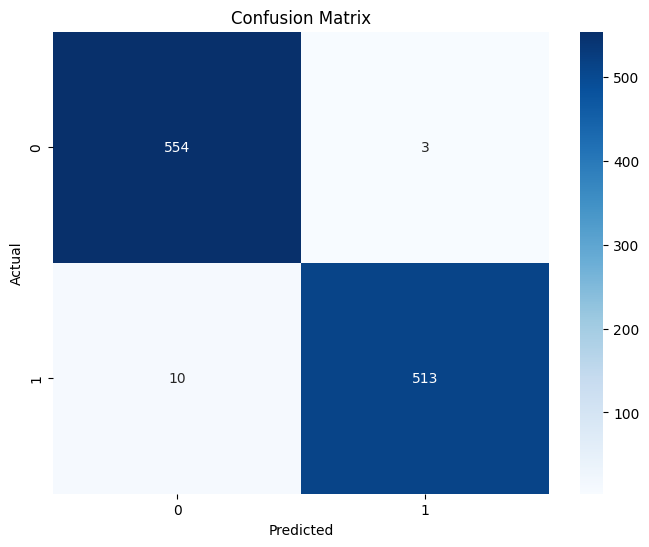

In [7]:
# Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### A3. Plot hasil Prediksi

Memvisualisasikan model SVM yang memisahkan data berdasarkan fitur `'Price'` dan `'Customer Rating'`, dengan menyoroti support vectors serta menampilkan decision boundary dan margin

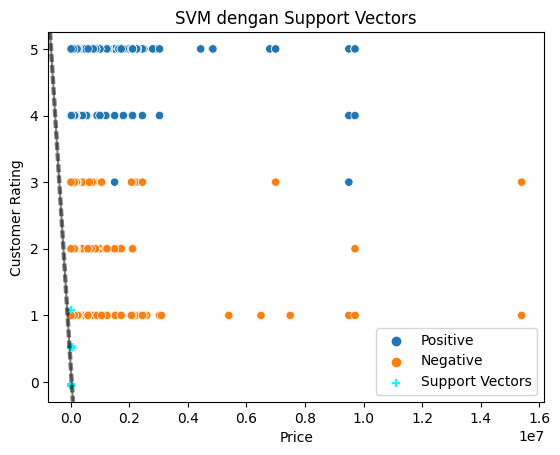

In [8]:
sns.scatterplot(x='Price', y='Customer Rating', hue='Sentiment', data=df)
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('Price')
plt.ylabel('Customer Rating')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

### B. Unsupervised Learning
---

#### B1. Implementasi metode K-Means

2 Target

In [9]:
X = df[["Price", "Customer Rating"]]
K = 2

In [10]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Mengambil dan Menambahkan Label pada df dari `kmeans.labels_` dan mengambil titik pusat dari cluster

In [11]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

Visualisasi dari hasil clustering dengan menggunakan "Price" dan "Customer Rating" sebagai sumbu x dan y, mewarnai titik berdasarkan clusternya, dan menambahkan centroid dari setiap cluster.

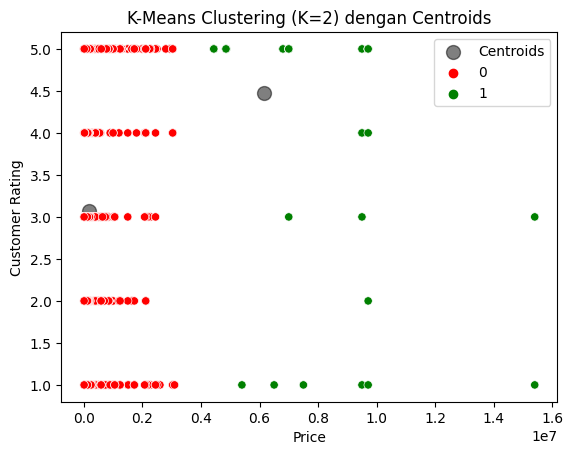

In [12]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="Price", y="Customer Rating", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Price")
plt.ylabel("Customer Rating")
plt.legend()
plt.show()

Menampilkan Cross Tabulation

In [13]:
cross_tab = pd.crosstab(df["cluster"], df["Sentiment"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Sentiment  Negative  Positive
cluster                      
0              2812      2519
1                 9        60 



ARI mengukur kesamaan antara dua pembagian data

In [14]:
ari = adjusted_rand_score(df["Sentiment"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Mengubah Sentiment menjadi numerik dan mengukur informasi set label dengan label asli

In [15]:
true_labels_num = df["Sentiment"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.01


* Homogeneity: Mengukur sejauh mana setiap cluster hanya berisi titik data dengan kelas yang sama.
* Completeness: Mengukur sejauh mana semua titik data yang memiliki kelas yang sama ditempatkan dalam cluster yang sama.
* V-Measure: Adalah rata-rata harmonik dari homogeneity dan completeness, memberikan ukuran gabungan dari keduanya.

In [16]:
homogeneity = homogeneity_score(df["Sentiment"], cluster_labels)
completeness = completeness_score(df["Sentiment"], cluster_labels)
v_measure = v_measure_score(df["Sentiment"], cluster_labels)

menampilkan dua set titik di plot yang sama: satu set mewakili label asli `"Sentiment"` dan satu set mewakili hasil clustering.

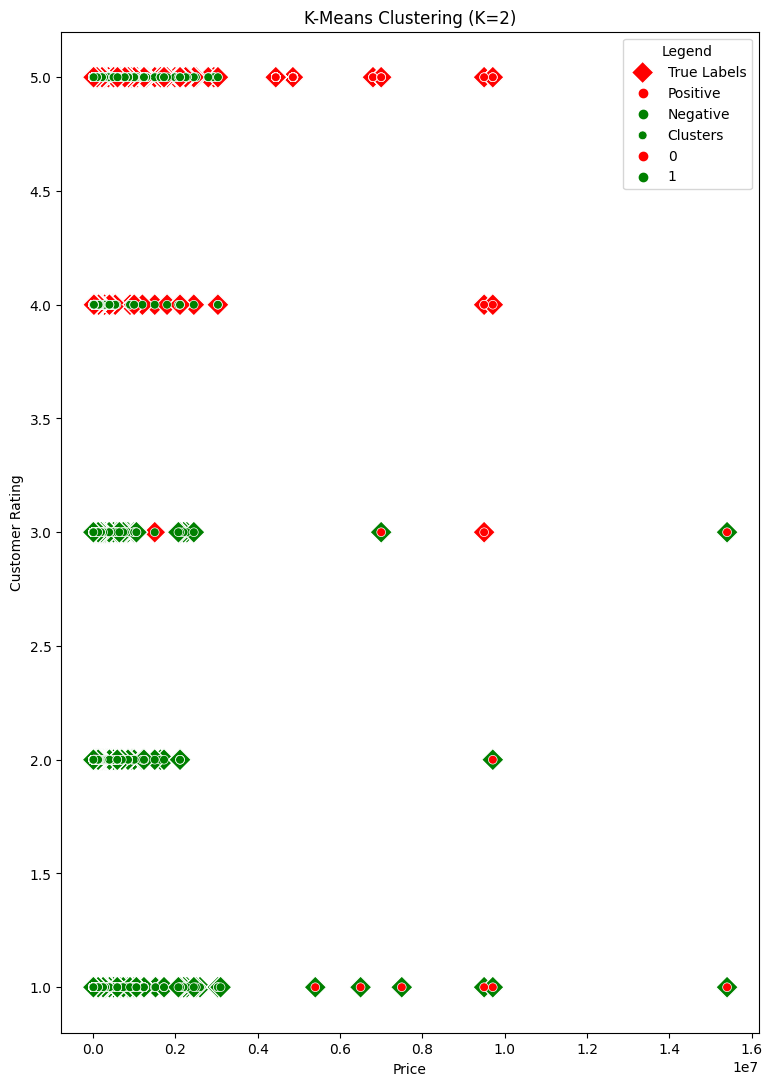

In [17]:
cluster_mapping = {0: 1, 1: 0}

df["cluster2"] = df["cluster"].map(cluster_mapping)

# Buat sebuah scatter plot untuk data-points label aslinya

plt.figure(figsize=(9,13))
warna = ["red", "green"]

sns.scatterplot(df, x="Price", y="Customer Rating", palette=warna, hue="Sentiment", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(df, x="Price", y="Customer Rating", palette=warna, hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel("Price")
plt.ylabel("Customer Rating")
plt.legend(title="Legend", loc="upper right")
plt.show()